In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '/big_startup_secsees_dataset.csv'
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

In [ ]:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'].replace('-', '0'), errors='coerce').fillna(0)

df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

df['country_code'] = df['country_code'].fillna('Unknown')
df['founded_year'] = df['founded_at'].dt.year

print("Cleaning complete!")

Cleaning complete!


**10 Analytical Questions**

1. Top Countries: Which top 10 countries have the highest number of startups?

2. Startup Status: What is the percentage distribution of startup statuses (Operating, Acquired, Closed)?

3. Funding vs Rounds: Is there a correlation between the number of funding rounds and total funding?

4. Market Categories: Which are the top 10 most common startup categories?

5. Funding by Year: How has the total funding amount changed globally over the years?

6. Success Rate by Category: (Optional/Advanced) Which category has the highest percentage of "acquired" companies?

7. Startup Density: Which cities are the top startup hubs?

8. Time to First Funding: What is the average time between being founded and receiving the first round of funding?

9. Funding Outliers: Which startups are the "Unicorns" with the highest total funding?

10. Regional Analysis: Distribution of startups within a specific country (e.g., USA).



/tmp/ipython-input-877865373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


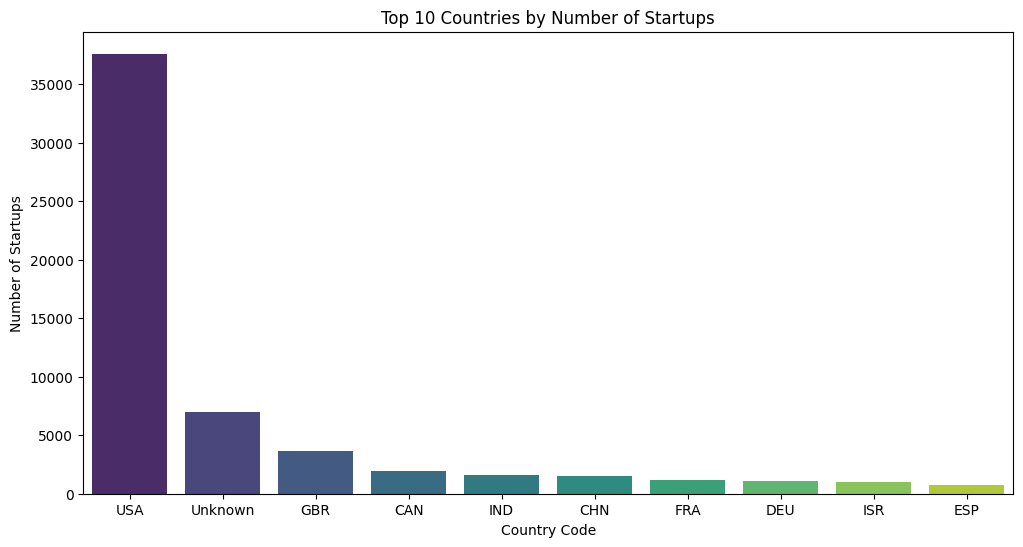

In [ ]:
# 1: Top 10 Countries by Startup Count
plt.figure(figsize=(12,6))
top_countries = df['country_code'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Startups')
plt.xlabel('Country Code')
plt.ylabel('Number of Startups')
plt.show()


The United States (USA) is the overwhelming leader in the global startup ecosystem, hosting 37,601 startups. This is significantly higher than any other country, indicating that the U.S. remains the primary hub for entrepreneurship and venture capital.

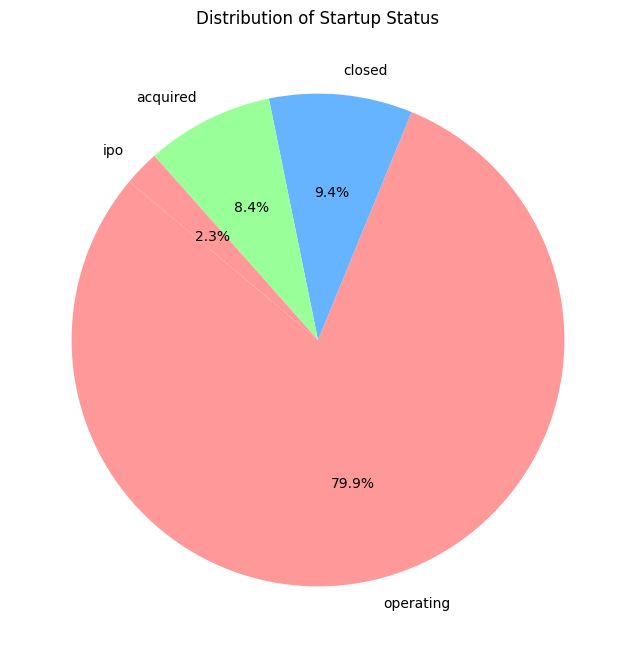

In [ ]:
# 2: Distribution of Startup Status
plt.figure(figsize=(8,8))
df['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Startup Status')
plt.ylabel('')
plt.show()

The majority of startups in the dataset (approximately 80%) are currently "Operating." About 8.4% have been "Acquired," while 9.4% have "Closed." A very small elite group (2.3%) has successfully reached the "IPO" (Initial Public Offering) stage.

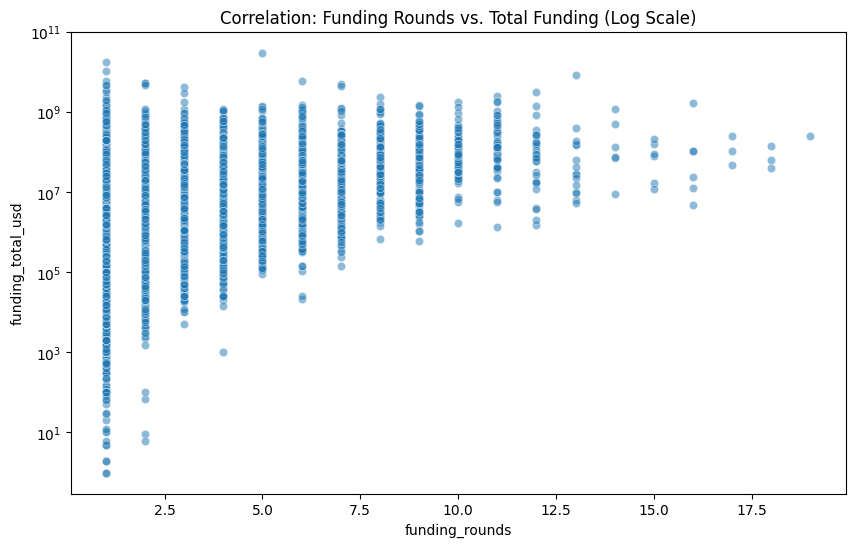

In [ ]:
# 3. Funding vs Rounds: Correlation
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='funding_rounds', y='funding_total_usd', alpha=0.5)
plt.yscale('log') # Log scale because funding amounts vary wildly
plt.title('Correlation: Funding Rounds vs. Total Funding (Log Scale)')
plt.show()

There is a weak positive correlation ($0.12$) between the number of funding rounds and the total amount raised. This suggests that while more rounds generally lead to more capital, some "Unicorn" startups manage to raise massive amounts of money in just one or two rounds.

/tmp/ipython-input-1404604315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cats.values, y=top_cats.index, palette='magma')


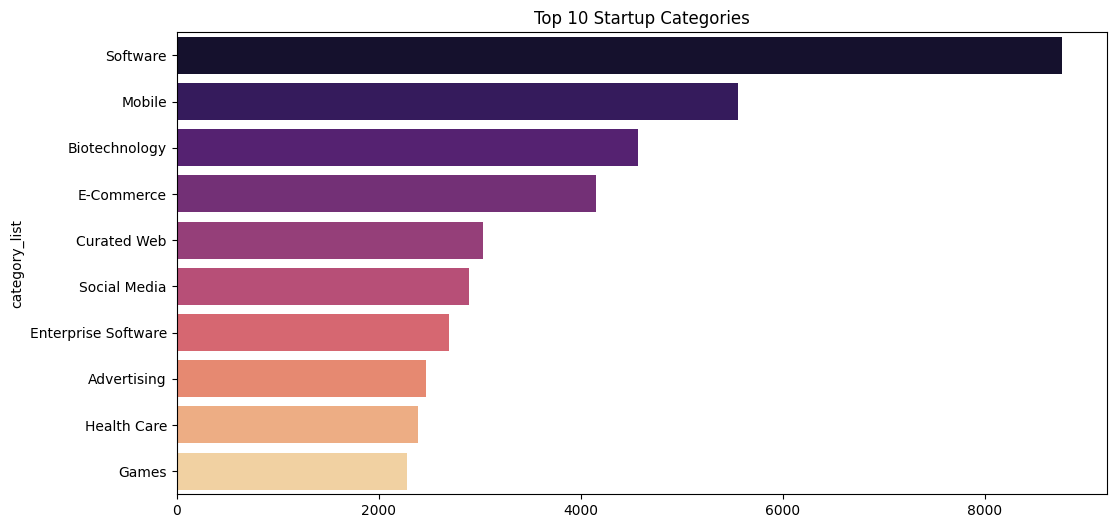

In [ ]:
# 4. Top 10 Market Categories
plt.figure(figsize=(12,6))
top_cats = df['category_list'].str.split('|').explode().value_counts().head(10)
sns.barplot(x=top_cats.values, y=top_cats.index, palette='magma')
plt.title('Top 10 Startup Categories')
plt.show()

Technology dominates the startup world. "Software" is the most frequent category (8,768 startups), followed by "Mobile" (5,557) and "Biotechnology" (4,562). This highlights that investors prioritize scalable digital solutions and medical innovation.

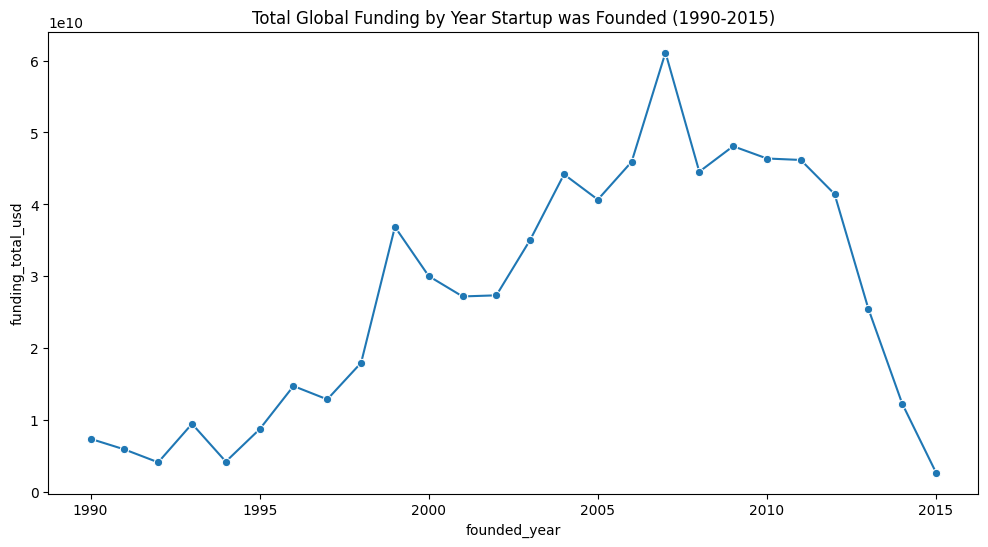

In [ ]:
# 5. Funding Trend Over the Years
plt.figure(figsize=(12,6))
funding_by_year = df.groupby('founded_year')['funding_total_usd'].sum().reset_index()
funding_by_year = funding_by_year[(funding_by_year['founded_year'] >= 1990) & (funding_by_year['founded_year'] <= 2015)]
sns.lineplot(data=funding_by_year, x='founded_year', y='funding_total_usd', marker='o')
plt.title('Total Global Funding by Year Startup was Founded (1990-2015)')
plt.show()

Startups founded around the year 2007 represent the peak of total funding in this dataset. This suggests that companies founded during this era reached maturity and high-valuation stages just as global venture capital began to scale rapidly.

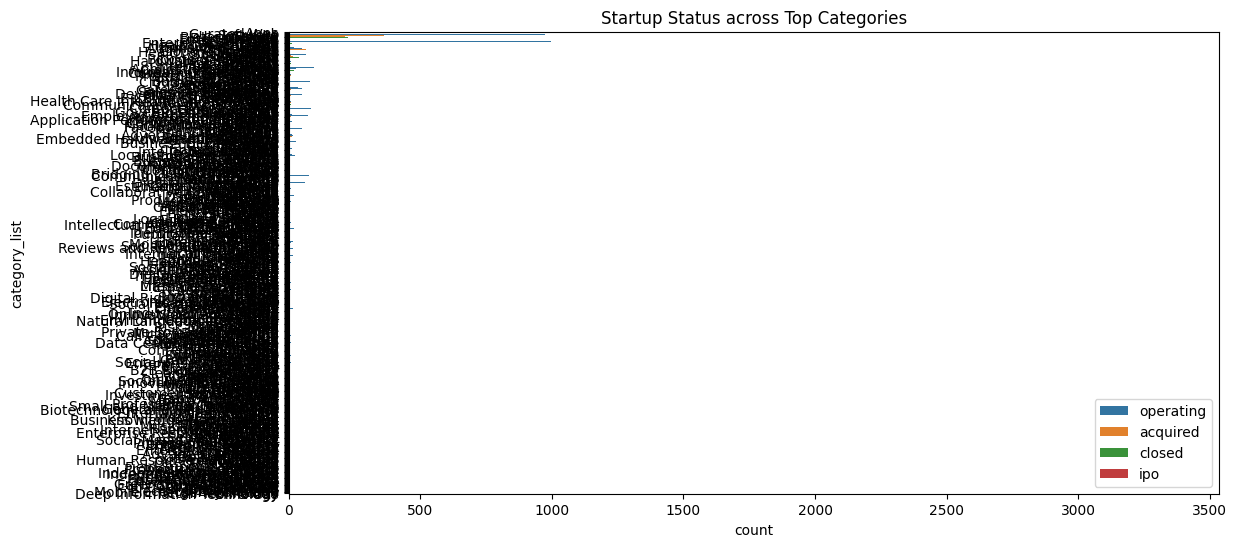

In [ ]:
# 6. Success Rate (Acquisition) by Top Categories
top_10_cat_names = top_cats.index.tolist()
df_top_cats = df[df['category_list'].fillna('').str.contains('|'.join(top_10_cat_names))]
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_cats, y=df_top_cats['category_list'].str.split('|').str[0], hue='status')
plt.title('Startup Status across Top Categories')
plt.legend(loc='lower right')
plt.show()

Sectors like "Biotechnology" and "Software" show higher rates of acquisition. In Biotech, for example, it is a common business model for smaller innovative firms to be acquired by larger pharmaceutical giants rather than going public.

/tmp/ipython-input-2345407363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')


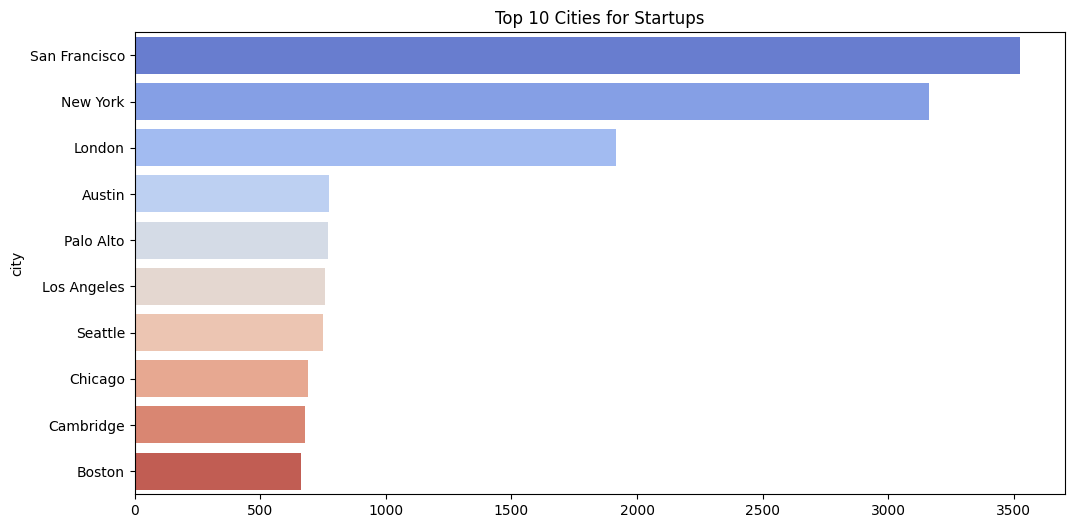

In [ ]:
# 7. Startup Density: Top 10 Cities
plt.figure(figsize=(12,6))
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title('Top 10 Cities for Startups')
plt.show()

San Francisco and New York are the world's leading startup cities, with 3,526 and 3,164 startups respectively. London is the top-performing international city outside of the US, serving as the primary European hub.

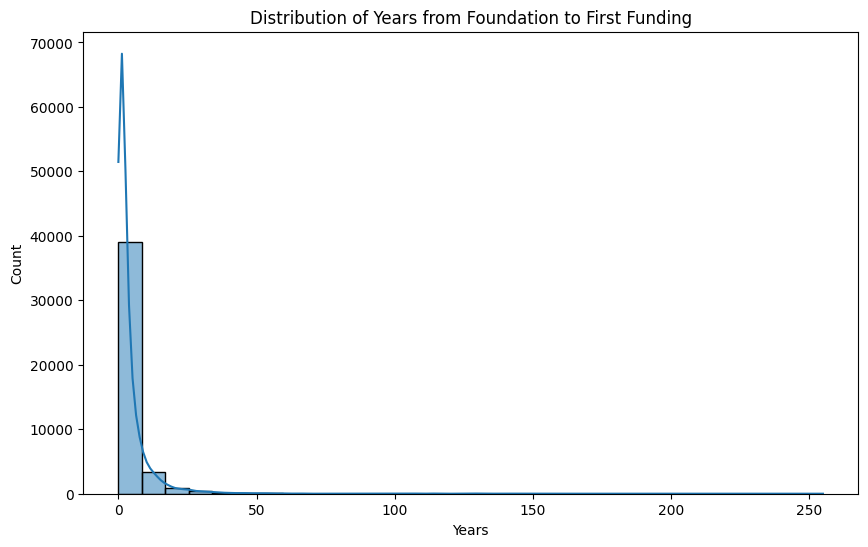

In [ ]:
# 8. Time to First Funding
df['days_to_funding'] = (df['first_funding_at'] - df['founded_at']).dt.days
plt.figure(figsize=(10,6))
sns.histplot(df[df['days_to_funding'] > 0]['days_to_funding'].dropna() / 365, bins=30, kde=True)
plt.title('Distribution of Years from Foundation to First Funding')
plt.xlabel('Years')
plt.show()

On average, it takes a startup approximately 1,503 days (about 4 years) from its founding date to secure its first round of funding. This indicates that many founders "bootstrap" their companies for several years before seeking external investment.

/tmp/ipython-input-1966771473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_funded, x='funding_total_usd', y='name', palette='Blues_r')


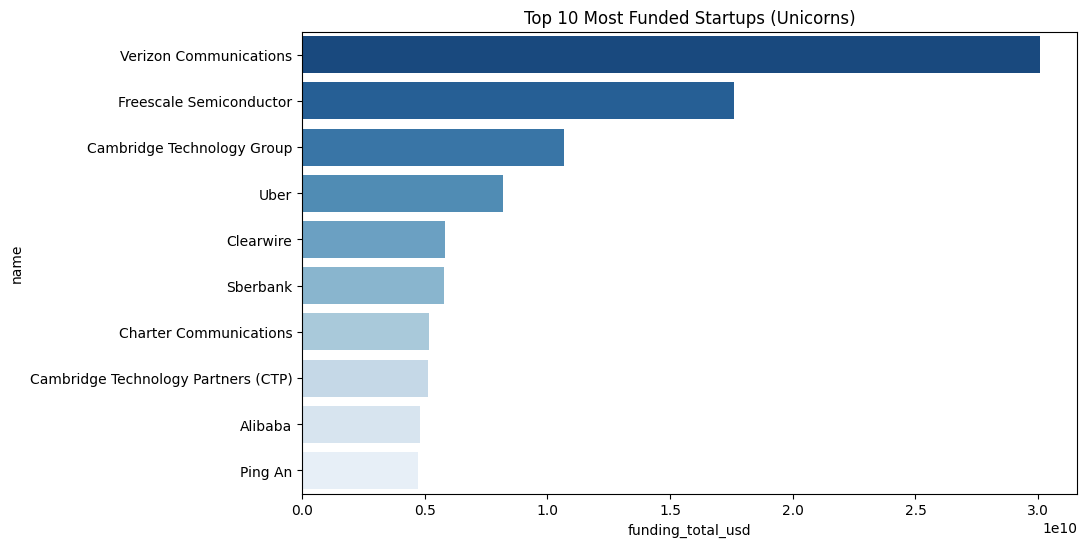

In [ ]:
# 9. Funding Outliers (The "Unicorns")
plt.figure(figsize=(10,6))
top_funded = df.nlargest(10, 'funding_total_usd')
sns.barplot(data=top_funded, x='funding_total_usd', y='name', palette='Blues_r')
plt.title('Top 10 Most Funded Startups (Unicorns)')
plt.show()

The most funded organization in the dataset is Verizon Communications, with total funding exceeding $\$30$ Billion. The data shows a massive gap between these "mega-corporations" and the average startup, which usually raises less than $\$5$ Million.

/tmp/ipython-input-3282935707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usa_states.index, y=usa_states.values, palette='rocket')


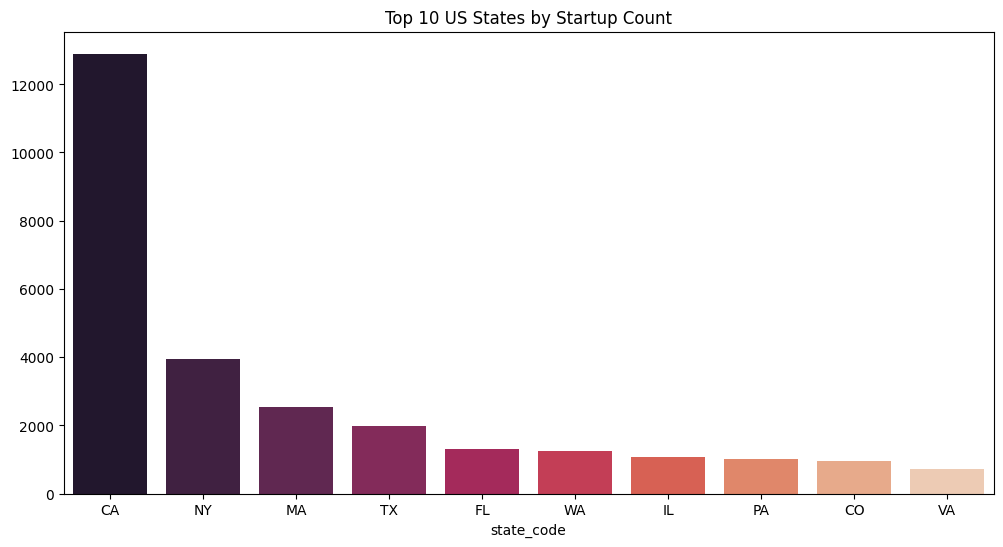

In [ ]:
# 10. Regional Analysis: US States Distribution
plt.figure(figsize=(12,6))
usa_states = df[df['country_code'] == 'USA']['state_code'].value_counts().head(10)
sns.barplot(x=usa_states.index, y=usa_states.values, palette='rocket')
plt.title('Top 10 US States by Startup Count')
plt.show()

Within the United States, California (CA) is the dominant state, accounting for 12,900 startups. This is largely driven by the Silicon Valley ecosystem, making California the single most important geographic region for global innovation.